<a href="https://colab.research.google.com/github/CodeForeverZou/1book/blob/master/emb%2BRNN_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 挂载硬盘

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Model/emb_rnn_IMDB')
!ls
!pwd

Mounted at /content/drive
emb_flat.h5	       emb_lstm_training_log.csv    emb_rnn_train_log_0505.csv
emb_lstm.h5	       emb_lstm_train_log_0415.csv  test.csv
emb_lstm_IMDB_0415.h5  emb_rnn_IMDB_0505.h5	    train_labels.csv
/content/drive/My Drive/Colab Notebooks/Model/emb_rnn_IMDB


# 读取IMDB数据集，并转成文本
（默认原本读取为向量）

In [ ]:
import keras
from keras.preprocessing import sequence
imdb = keras.datasets.imdb
#导入数据
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=20000)
# (train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

'''====================================
一个映射单词到整数索引的词典
'''
word_index = imdb.get_word_index()
# 保留第一个索引
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
#先将TensorFlow中读取imdb数字列表转换成文本，因为Tokenizer处理文本数据
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

'''===================================='''

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


1646592/1641221 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


'===================================='

In [ ]:
train_len = len(train_data)
print(train_len)
train_text=[]
for i in range(train_len):
  train_text.append(decode_review(train_data[i]))

from keras.preprocessing.text import Tokenizer

#词库大小2000,Tokenizer处理文本数据
token=Tokenizer(num_words=20000)
# token=Tokenizer(num_words=10000)
token.fit_on_texts(train_text)
x_train_seq=token.texts_to_sequences(train_text)
#x_test_seq=token.texts_to_sequences(test_data)
#处理成，句长为100
x = sequence.pad_sequences(x_train_seq,maxlen=200)
#x_test=sequence.pad_sequences(x_test_seq,maxlen=100)

25000


In [ ]:
import csv
# data = [    ("Ken", "msfe", 23),    ("TeMe", "maee", 29),    ("Js", "fele", 92)]
with open('./test.csv', 'w', newline='') as t_file:
  csv_writer = csv.writer(t_file)
  for l in x:
    csv_writer.writerow(l)

In [ ]:
# print(train_labels[0])
with open('./train_labels.csv', 'w', newline='') as t_file:
  csv_writer = csv.writer(t_file)
  csv_writer.writerow(train_labels)

In [ ]:
test_text=[]
for i in range(train_len):
  test_text.append(decode_review(test_data[i]))

x2_train_seq = token.texts_to_sequences(test_text)
#x_test_seq=token.texts_to_sequences(test_data)
#处理成，句长为100
x2 = sequence.pad_sequences(x2_train_seq, maxlen=100)
print(x2[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0   29  589  201   12   30    4  716    8    8    1
    1    3    2  359    5    2  176 5770  392  353    2  122    7 1033
 1033 1033    8    8   11   91  123   88  486 7980   99   26 1670   12
   30   21   25 7489   27  219  466    6  123   12  285  169    6  156
   45    3   25  238   14  178    1   37   31   23 7980  449  201   12
    4  716]


In [ ]:
print(test_data[0])

In [ ]:
print(x[0])
print(decode_review(train_data[0]))

[ 127   49   34  126   42   22 1262   32    4   20   10  181   27   73
   52    3   12  420   14   93    1    6    2  110  107   13  241    2
    1    5 1954    3  847   34   70   45  513  421   25  400  322   48
    5    2    1  786   11  112   74    2  377   13  312   97   31   53
   25  137    4  198   16    2  214   20   17  121  421   25  471    3
  147   26   16   49   34   27  237   86   22  112    2  214   63   14
   39 1380   74   10   14  265    3   14  120  102   31   13   14   18
  209   31]
<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and

# 实验 My_SimpleRNN

In [ ]:
# 自定义RNN
import tensorflow as tf
import keras.backend as K
tf.compat.v1.disable_eager_execution()
class My_SimpleRNN(tf.keras.layers.Layer):
  def __init__(self, units, **kwargs):
    self.units=units
    self.state_size=self.units
    self.output_size=self.units
    super(My_SimpleRNN, self).__init__(**kwargs)

  def build(self, input_shape):
    self.kernel=self.add_weight(name='kernel',shape=(input_shape[-1],self.units),initializer='glorot_uniform')
    print('input_shape',input_shape[-1])
    self.recurrent_kernel=self.add_weight(name='recurrent_kernel',shape=(self.units,self.units),initializer='orthogonal')
    self.bias=self.add_weight(name='bias',shape=(self.units,),initializer='zeros')

  def step_to(self, inputs ,states):
    h=K.dot(states[0],self.recurrent_kernel)
    print('h',h.shape)
    print('inputs',inputs.shape)
    print('k1',self.kernel.shape)
    h=K.bias_add(h,self.bias)
    outputs=K.relu(h+K.dot(inputs,self.kernel))
    return outputs,[outputs]

  def call(self, inputs):
    init_states=[K.zeros((K.shape(inputs)[0],self.output_size))]
    states=init_states
    outputs=K.rnn(self.step_to, inputs, states)
    #print(outputs.shape)
    return outputs[0]

  def get_config(self):
    config = {"units":self.units}
    base_config = super(My_SimpleRNN, self).get_config()
    return dict(list(base_config.items()) + list(config.items()))


input_shape 128
h (None, 128)
inputs (None, 128)
k1 (128, 128)
h (None, 128)
inputs (None, 128)
k1 (128, 128)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
my__simple_rnn (My_SimpleRNN (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 2,593,025
Trainable params: 2,593,025
Non-trainable params: 0
_________________________________________________________________
Train on 23000 samples, validate on 2000 samples
Epoch 1/20
23000/23000 [==============================] - ETA: 0s - loss: 0.6204 - accuracy: 0.6521

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


23000/23000 [==============================] - 25s 1ms/sample - loss: 0.6204 - accuracy: 0.6521 - val_loss: 0.4194 - val_accuracy: 0.7975
Epoch 2/20
23000/23000 [==============================] - 25s 1ms/sample - loss: 0.3646 - accuracy: 0.8424 - val_loss: 0.4485 - val_accuracy: 0.7980
Epoch 3/20
23000/23000 [==============================] - 25s 1ms/sample - loss: 0.3067 - accuracy: 0.8719 - val_loss: 0.4053 - val_accuracy: 0.8150
Epoch 4/20
23000/23000 [==============================] - 25s 1ms/sample - loss: 0.2369 - accuracy: 0.9070 - val_loss: 0.4756 - val_accuracy: 0.8255
Epoch 5/20
23000/23000 [==============================] - 25s 1ms/sample - loss: 0.2221 - accuracy: 0.9138 - val_loss: 0.4119 - val_accuracy: 0.8575
Epoch 6/20
23000/23000 [==============================] - 25s 1ms/sample - loss: 0.1460 - accuracy: 0.9455 - val_loss: 0.4532 - val_accuracy: 0.8165
Epoch 7/20
23000/23000 [==============================] - 25s 1ms/sample - loss: 0.1841 - accuracy: 0.9410 - val_loss

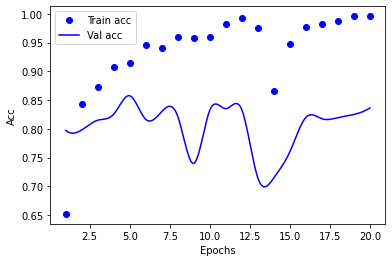

In [ ]:
# 定义模型
model = keras.Sequential()
model.add(keras.layers.Embedding(20000, 128))
model.add(My_SimpleRNN(128))
model.add(keras.layers.Dense(1, activation='sigmoid'))
# model.add(keras.layers.Activation('sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# model.fit(x, train_labels[:1000], epochs = 3)
model.summary()
# history = model.fit(x, train_labels, epochs = 20, batch_size=512, validation_split=0.8)
# print(x[1])
history = model.fit(x[2000:], train_labels[2000:], epochs = 20, batch_size=128, validation_data=(x[:2000], train_labels[:2000]))

# 绘图
history.history.keys()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
x_new = np.linspace(min(epochs), max(epochs), 300)
y_smooth = make_interp_spline(epochs, val_acc)(x_new)

plt.plot(epochs, acc, 'bo', label = 'Train acc')
plt.plot(x_new, y_smooth, 'b', label = 'Val acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')

plt.legend()
plt.show()

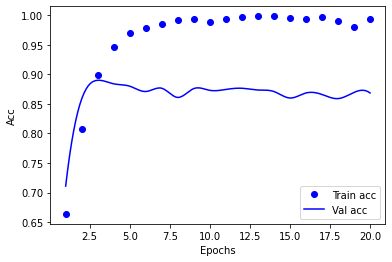

In [ ]:
# up MySimpleRNN
# down keras.RNN

In [ ]:
# 存储模型
# tf.saved_model.save(model, "./1") emb_lstm_training_log
os.chdir('/content/drive/My Drive/Colab Notebooks/Model/emb_rnn_IMDB')
import time
file_name = './emb_rnn_IMDB_' + time.strftime("%m%d") + '.h5'
model.save(file_name)
# 保存训练的日志文件 history
import pandas as pd
his_name = './emb_rnn_train_log_' + time.strftime("%m%d") + '.csv'
pd.DataFrame(history.history).to_csv(his_name, index=False)

In [ ]:
# 读取模型
import keras
import numpy as np

_custom_objects = {
    "My_SimpleRNN" :  My_SimpleRNN
   #"loss" : Myloss
}

model = keras.models.load_model('emb_rnn_IMDB_0505.h5', custom_objects=_custom_objects)
model.summary()

input_shape 128
h (None, 128)
inputs (None, 128)
k1 (128, 128)
h (None, 128)
inputs (None, 128)
k1 (128, 128)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
my__simple_rnn (My_SimpleRNN (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 2,593,025
Trainable params: 2,593,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
emb = model.get_layer('embedding_4').get_weights()
print('Emb:', emb[0].shape, len(emb[0]), len(emb[0][1]))

wx, wh, b = model.get_layer('my__simple_rnn').get_weights()
print('rnn:', wx.shape, wh.shape, b.shape)

w2, b2 = model.get_layer('dense_2').get_weights()
print(w2.shape, b2.shape)

EXPAND=10000
emb = (emb[0]*EXPAND).astype(np.int32)
wx = (wx*EXPAND).astype(np.int32)
wh = (wh*EXPAND).astype(np.int32)
b = (b*EXPAND).astype(np.int32)
w2 = (w2*EXPAND).astype(np.int32)
b2 = (b2*EXPAND).astype(np.int32)

Emb: (20000, 128) 20000 128
rnn: (128, 128) (128, 128) (128,)
(128, 1) (1,)


In [ ]:
def embed(x):
  emb_out = []
  for i in x:
    emb_out.append(emb[0][i])
    # emb_out.append(emb[0][i])
  emb_out = np.array(emb_out)
  return (emb_out)

def embed_Int(x):
  emb_out = []
  for i in x:
    emb_out.append(emb[i])
  emb_out = np.array(emb_out)
  return (emb_out)

# import tensorflow as tf
# from tensorflow.python.ops import nn
# from tensorflow.python.keras import backend as K

def rnn(a, b, c, x, hidden_num):
  h0=np.zeros((1, hidden_num))
  for i in x:
    h0=np.dot(h0,b)
    h0=h0+c
    # if(count_i==count_j):print(h0,'\n')
    h0=h0+np.dot(i,a)
    # if(count_i==count_j):print(h0,'\n')#print(i,a[0])
    h0=np.maximum(h0,0)
    # if(count_i==count_j):print(h0,'\n')
  return h0

def int_dot(a,b):
  h=(np.dot(a,b)/EXPAND).astype(np.int32)
  return h

def rnn_Int(a, b, c, x, hidden_num):
  h0=np.zeros((1, hidden_num)).astype(np.int32)
  for i in x:
    h0=int_dot(h0,b)
    #if(count_i==count_j):print(h0,'\n')
    h0=h0+c
    #if(count_i==count_j):print(h0,'\n')
    h0=h0+int_dot(i,a)
    #if(count_i==count_j):print(h0,'\n')#print(i,a[0])
    h0=np.maximum(h0,0)
    #if(count_i==count_j):print(h0,'\n')
  return h0

In [ ]:
embL = model.get_layer('embedding_4')
embL_Out = embL(x[:1])
print(embL_Out.shape, embL_Out[0][:2], embL_Out[0][-2:])

lstmL = model.get_layer('my__simple_rnn')
lstmL_Out = lstmL(embL_Out)
print(lstmL_Out.shape, lstmL_Out[0][:2], lstmL_Out[0][-2:])

denseL = model.get_layer('dense_2')
denseL_Out = denseL(lstmL_Out)
print(denseL_Out)

(1, 200, 128) Tensor("strided_slice_20:0", shape=(2, 128), dtype=float32) Tensor("strided_slice_22:0", shape=(2, 128), dtype=float32)
h (1, 128)
inputs (1, 128)
k1 (128, 128)
h (1, 128)
inputs (1, 128)
k1 (128, 128)
(1, 128) Tensor("strided_slice_24:0", shape=(2,), dtype=float32) Tensor("strided_slice_26:0", shape=(2,), dtype=float32)
Tensor("dense_2_3/Sigmoid:0", shape=(1, 1), dtype=float32)


In [ ]:
len_train = 1
correct_cnt = 0

for i in range(len_train):
  # emb_out = embed(x[i])
  # rnn_out = rnn(wx, wh, b, emb_out, 128)
  # dense2_out = np.dot(rnn_out, w2) + b2
  emb_out = embed_Int(x[i])
  rnn_out = rnn_Int(wx, wh, b, emb_out, 128)
  dense2_out = int_dot(rnn_out, w2) + b2
  print(emb_out)
  print(rnn_out)
  print(dense2_out)
  if i % 100 == 0: print(i)
  if (train_labels[i] == 1 and dense2_out > 0) or (train_labels[i] == 0 and dense2_out < 0): correct_cnt += 1
  # print(train_labels[i], 1 if dense2_out > 0 else 0, dense2_out)

print(correct_cnt, correct_cnt/len_train)

[[-432  225  247 ...  187 -861 -293]
 [-334  356  598 ...   70  471 -323]
 [  36 -368 -859 ...  668    5  -50]
 ...
 [-120 -295 -332 ...  -62  -90 -330]
 [ 375 -623 -577 ...  121  283 -448]
 [-364 -287 -295 ... -186   52  287]]
[[   0    0 3264    0 2126    0 5169 6925 1091    0    0 1589    0    0
     0    0 2704 3234  778 1280    0    0 5037 1918    0   39    0    0
     0  646    0    0    0    0    0    0    0 2172    0  261    0 4074
     0    0    0 3780    0    0    0 3651    0    0    0    0    0    0
  1085    0    0  312    0    0    0    0  610    0    0    0 1120    0
  1061  548    0 1756 2622    0    0    0    0    0    0    0    0    0
   835    0    0    0    0 1097    0    0    0 1475    0    0    0    0
     0    0    0    0    0    0  747 1139    0    0    0    0    0    0
     0    0    0  483  438    0    0  249 1410  388    0    0  260  450
     0    0]]
[[21346]]
0
1 1.0


In [ ]:
len_train = 1000
correct_cnt = 0

for i in range(len_train):
  emb_out = embed(x[i])
  # lstm_out = my_lstm(emb_out, 128, wx, wh, b)
  rnn_out = rnn(wx, wh, b, emb_out, 128)
  dense2_out = np.dot(rnn_out, w2) + b2
  # dense2_out = int_dot(lstm_out[-1], w2) + b2
  # print(emb_out)
  # print(rnn_out)
  # print(dense2_out)
  if i % 100 == 0: print(i)
  if (train_labels[i] == 1 and dense2_out > 0) or (train_labels[i] == 0 and dense2_out < 0): correct_cnt += 1
  # print(train_labels[i], 1 if dense2_out > 0 else 0, dense2_out)

print(correct_cnt, correct_cnt/len_train)

0
100
200
300
400
500
600
700
800
900
842 0.842


In [ ]:
len_train = 1000
correct_cnt = 0

for j in range(len_train):
  i = j + 2000
  emb_out = embed_Int(x[i])
  rnn_out = rnn_Int(wx, wh, b, emb_out, 128)
  dense2_out = int_dot(rnn_out, w2) + b2
  # print(emb_out)
  # print(rnn_out)
  # print(dense2_out)
  if i % 100 == 0: print(i)
  if (train_labels[i] == 1 and dense2_out > 0) or (train_labels[i] == 0 and dense2_out < 0): correct_cnt += 1
  # print(train_labels[i], 1 if dense2_out > 0 else 0, dense2_out)

print(correct_cnt, correct_cnt/len_train)

2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
937 0.937
